### The Theoretical Model:

We seek to estimate a linear function $f(X)$ such that $Y = \beta_0 + \beta_1 X + \epsilon$.$\beta_0$ 

(Intercept): Expected sales when investment in TV is 0.$\beta_1$ 

(Slope): The average change in sales for each extra unit invested in TV. $\epsilon$ 

(Error Term): Captures everything that the model cannot explain (irreducible variance).


Method: Ordinary Least Squares (OLS). We seek the coefficients that minimize the Sum of Squared Residuals (RSS):$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [2]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 23.7 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 24.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
# We load the dataframe available in the course resources. 
df = pd.read_csv('../data/Advertising.csv', index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

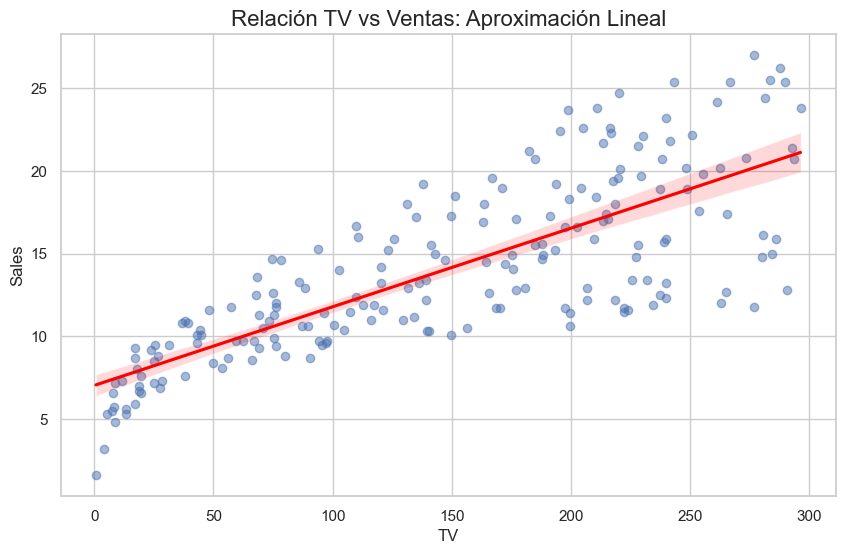

In [5]:
# line and residue visualization
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='TV', y='Sales', data=df, ci=95, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax.set_title('Relación TV vs Ventas: Aproximación Lineal', fontsize=16)
plt.show()

In [7]:
# The Model (OLS - Ordinary Least Squares)
# We use statsmodels to obtain the detailed table
X = df['TV']
y = df['Sales']
X_cons = sm.add_constant(X)


model = sm.OLS(y, X_cons).fit()

# Model details
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.47e-42
Time:                        22:09:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### Result: 

As we can see in the table, the t-statistic for TV is 17.6. Since it is greater than 2, we reject the null hypothesis. The confidence interval [0.042, 0.053] does not include zero, confirming a positive and significant relationship.

### Conclusion & Hypothesis Test ($H_0$):

Given that the t-statistic is 17.6 and P>|t| is 0, we reject $H_0$. There is a clear relationship: TV advertising affects sales.

Impact ($\beta_1$): The coefficient is approximately 0.0475.



For every additional $1,000 invested in TV, we sell 47.5 additional units of the product. 

Quality of Fit ($R^2$): The model explains approximately 61% of the variability in sales. The other 39% depends on factors that we are not measuring. Radio? Press? Economy?